In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

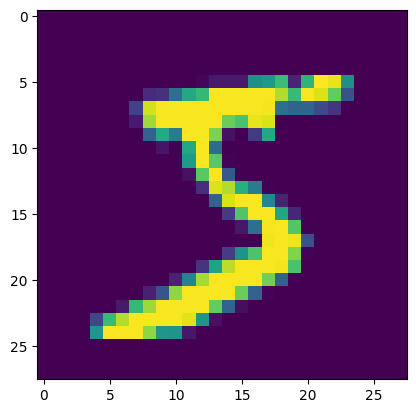

In [ ]:
x_train.shape,x_train.shape,x_test.shape,y_test.shape
plt.imshow(x_train[0,:,:])

In [ ]:
x_train_v = np.reshape(x_train , (x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test_v = np.reshape(x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
print(x_train_v.shape)
print(x_test_v.shape)

(60000, 784)
(10000, 784)


In [ ]:
y_train_o = tf.one_hot(y_train, 10)
y_test_o = tf.one_hot(y_test, 10)
print(y_train_o[:10])
print(y_test_o[:10])


tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(10, 10), dtype=float32)
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(10, 10), dtype=float32)


In [ ]:
x_train_v_n = x_train_v.astype('float32')/255
x_test_v_n = x_test_v.astype('float32')/255

In [ ]:
my_model = tf.keras.Sequential()
my_model.add(tf.keras.Input(shape = (784,)))
my_model.add(tf.keras.layers.Dense(8,activation='relu'))
my_model.add(tf.keras.layers.Dense(16,activation='relu'))
my_model.add(tf.keras.layers.Dense(10,activation='softmax'))
my_model.summary()

my_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                 loss = "categorical_crossentropy",
                 metrics = "accuracy",)

model_check = tf.keras.callbacks.ModelCheckpoint(filepath="sample_data",
                                                 monitor = "val_loss",
                                                 save_best_only = True,
                                                 mode = "min")

history = my_model.fit(x = x_train_v_n,
                        y = y_train_o,
                        batch_size = 8,
                        epochs = 25,
                        verbose = 1,
                        validation_split = 0.2,
                        callbacks = [model_check])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 8)                 6280      
                                                                 
 dense_34 (Dense)            (None, 16)                144       
                                                                 
 dense_35 (Dense)            (None, 10)                170       
                                                                 
Total params: 6594 (25.76 KB)
Trainable params: 6594 (25.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
6000/6000 [==============================] - 18s 3ms/step - loss: 0.5294 - accuracy: 0.8386 - val_loss: 0.4162 - val_accuracy: 0.8850
Epoch 2/25
6000/6000 [==============================] - 16s 3ms/step - loss: 0.4241 - accuracy: 0.8849 - val_loss: 0.4414 - val_accuracy: 

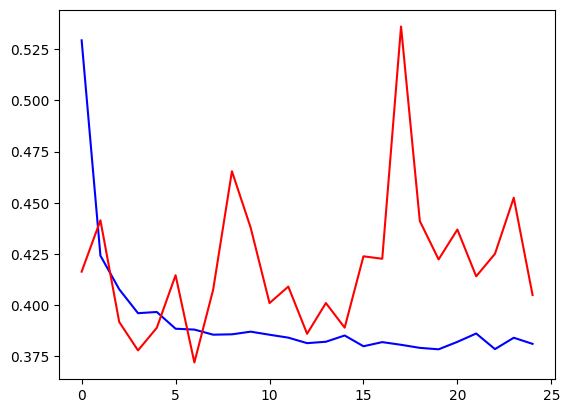

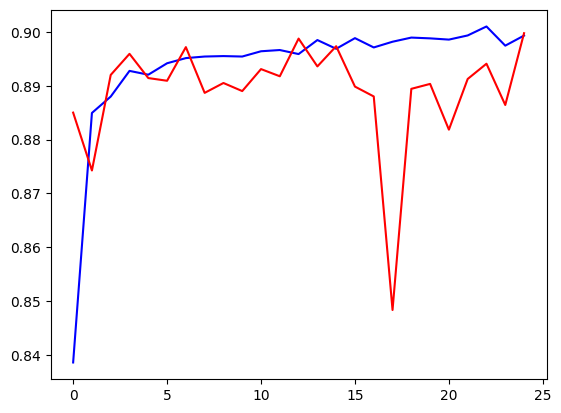

In [ ]:
plt.figure()
plt.plot(history.history['loss'],c="b")
plt.plot(history.history['val_loss'],c="r")

plt.figure()
plt.plot(history.history['accuracy'],c="b")
plt.plot(history.history['val_accuracy'],c="r")

#best_model = tf.keras.models.load_model("best_model.h5")
#print(best_model.predict(x_test_v_n[0,:]))